In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import json

In [8]:
path1 = 'D:/Deep Learning Projects/Image captioning - flickr8k/keras_model_1/'
path2 = 'D:/Deep Learning Projects/Image captioning - flickr8k/keras_model_2/'
imgcap_1 = tf.keras.models.load_model(os.path.join(path1,'image_to_caption_DS_1.keras'))
imgcap_2 = tf.keras.models.load_model(os.path.join(path2,'image_to_caption_DS_2.keras'))

In [48]:
with open(os.path.join(path1,"index_word.json"), 'r') as f:
    index_word = json.load(f)

with open(os.path.join(path1,"word_index.json"), 'r') as f:
    word_index = json.load(f)

In [32]:
number_of_images = 10
image_folder_path = 'D:/Deep Learning Projects/Image captioning - flickr8k/flickr8k/versions/1/Images'
images_possible = os.listdir(image_folder_path)
sample_image_indexes = np.random.randint(1,len(images_possible), size=number_of_images)

In [ ]:
def beam_search_decoder(model, image, word_index, index_word, max_len=34, beam_width=3):
    start_token = word_index['<start>']
    end_token = word_index['<end>']

    sequences = [([start_token], 0.0)]

    for _ in range(max_len - 1):
        all_candidates = []
        for seq, score in sequences:
            if seq[-1] == end_token:
                all_candidates.append((seq, score))
                continue
            padded_seq = tf.keras.preprocessing.sequence.pad_sequences([seq], maxlen=max_len, padding='post')
            preds = model.predict([image, padded_seq], verbose=0)[0, len(seq)-1]  # shape: (vocab_size,)
            # Get top beam_width predictions
            top_k_indices = np.argsort(preds)[-beam_width:]
            for idx in top_k_indices:
                candidate_seq = seq + [idx]
                candidate_score = score + np.log(preds[idx] + 1e-10)  # add epsilon to avoid log(0)
                all_candidates.append((candidate_seq, candidate_score))

        # Select the best beam_width sequences
        sequences = sorted(all_candidates, key=lambda tup: tup[1], reverse=True)[:beam_width]

    # Convert token ids to words
    best_sequence = sequences[0][0]
    decoded_sentence = [index_word.get(str(idx), '') for idx in best_sequence]
    return decoded_sentence


In [110]:
for idx in sample_image_indexes:
    raw_byte = tf.io.read_file(os.path.join(image_folder_path, images_possible[idx]))
    image_unicode = tf.image.decode_jpeg(raw_byte)
    img = tf.image.resize(image_unicode, (256, 256))
    img = tf.cast(img, tf.float32) / 255.0
    img = (img * 2.0) - 1.0
    img = tf.expand_dims(img, axis=0)

    sentence = beam_search_decoder(
        model=imgcap_1,
        image=img,
        word_index=word_index,
        index_word=index_word,
        max_len=34,
        beam_width=3  # You can adjust this
    )
    print(sentence)

['<start>', 'a', 'man', 'in', 'a', 'white', 'shirt', 'and', 'a', 'black', 'shirt', 'is', 'sitting', 'on', 'a', 'bench', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'red', 'shirt', 'is', 'riding', 'a', 'bike', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'red', 'shirt', 'is', 'riding', 'a', 'bike', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'red', 'shirt', 'and', 'a', 'black', 'shirt', 'is', 'standing', 'on', 'a', 'bench', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'red', 'shirt', 'is', 'riding', 'a', 'bike', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'white', 'shirt', 'and', 'a', 'black', 'shirt', 'is', 'sitting', 'on', 'a', 'bench', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'red', 'shirt', 'is', 'riding', 'a', 'bike', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'red', 'shirt', 'is', 'riding', 'a', 'bike', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'white', 'shirt', 'and', 'a', 'black', 'shirt', 'is', 'sitting', 'on', 'a', 'bench', '<end>']
['<start>', 'a', 'man', 'in', 'a', 'red'

In [111]:
with open(os.path.join(path2,"index_word.json"), 'r') as f:
    index_word2 = json.load(f)

with open(os.path.join(path2,"word_index.json"), 'r') as f:
    word_index2 = json.load(f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


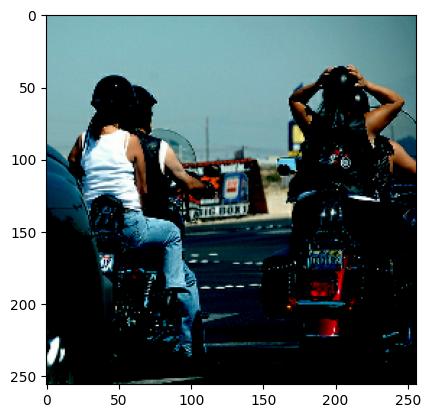

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'man', 'is', 'doing', 'a', 'trick', 'on', 'his', 'bike', '<end>']


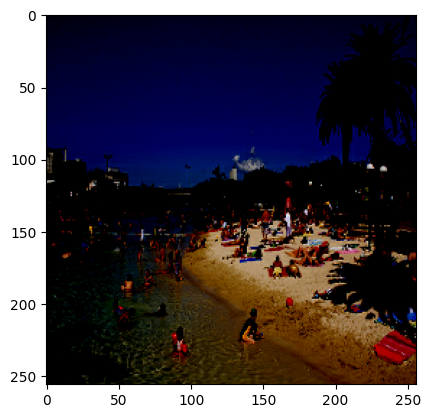

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'man', 'is', 'doing', 'a', 'trick', 'on', 'his', 'bike', '<end>']


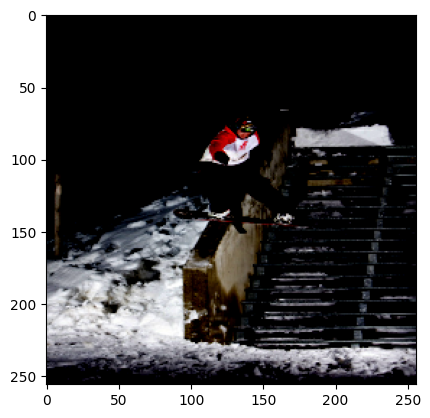

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'man', 'in', 'a', 'red', 'shirt', 'is', 'climbing', 'a', 'rock', '<end>']


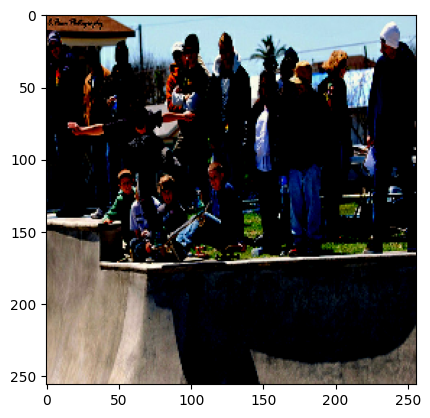

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'boy', 'in', 'a', 'red', 'shirt', 'is', 'doing', 'a', 'skateboard', 'trick', '<end>']


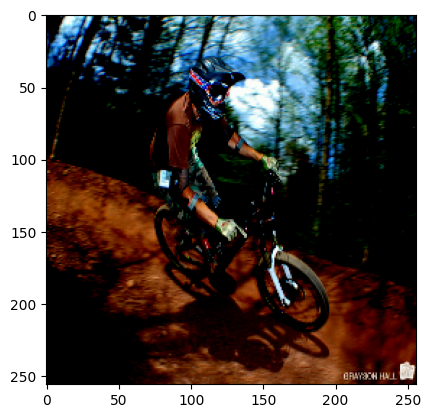

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'man', 'is', 'doing', 'a', 'trick', 'on', 'his', 'bike', '<end>']


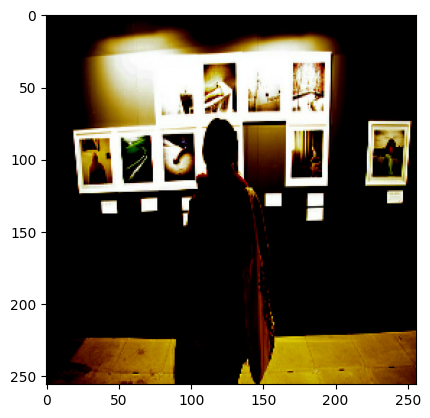

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'man', 'in', 'a', 'red', 'shirt', 'and', 'a', 'man', 'in', 'a', 'black', 'shirt', 'and', 'black', 'pant', 'are', 'standing', 'in', 'front', 'of', 'a', 'crowd', '<end>']


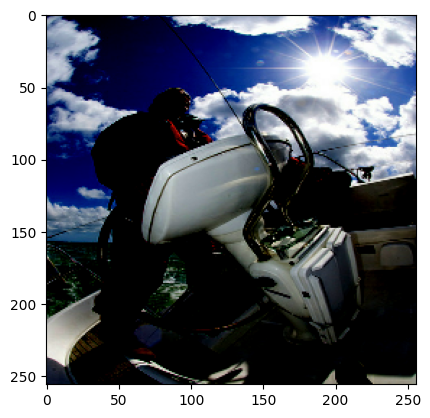

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'man', 'is', 'doing', 'a', 'trick', 'on', 'his', 'bike', '<end>']


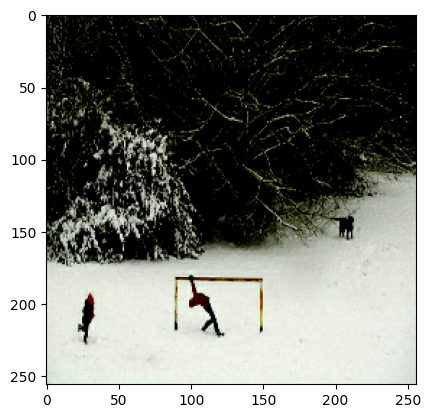

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'man', 'is', 'doing', 'a', 'trick', 'on', 'his', 'bike', '<end>']


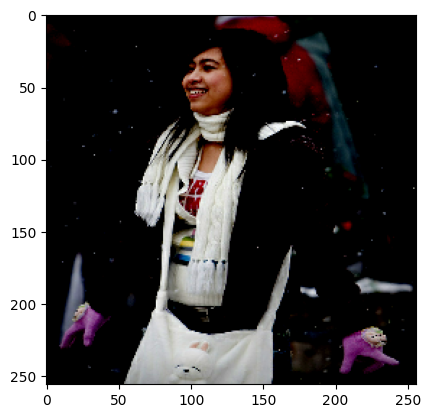

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'a', 'man', 'in', 'a', 'blue', 'shirt', 'is', 'standing', 'in', 'front', 'of', 'a', 'crowd', 'of', 'people', '<end>']


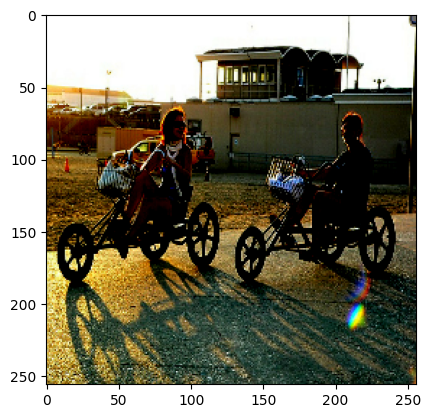

['<start>', 'a', 'little', 'girl', 'in', 'a', 'pink', 'dress', 'is', 'playing', 'with', 'a', 'hula', 'hoop', '<end>']


In [121]:
for idx in sample_image_indexes:
    raw_byte = tf.io.read_file(os.path.join(image_folder_path, images_possible[idx]))
    image_unicode = tf.image.decode_jpeg(raw_byte)
    img = tf.image.resize(image_unicode, (256, 256))
    img = tf.cast(img, tf.float32) / 255.0
    img = (img * 2.0) - 1.0
    img = tf.expand_dims(img, axis=0)
    plt.imshow(img[0])
    plt.show()
    sentence = beam_search_decoder(
        model=imgcap_2,
        image=img,
        word_index=word_index2,
        index_word=index_word2,
        max_len=34,
        beam_width=5  # You can adjust this
    )
    print(sentence)